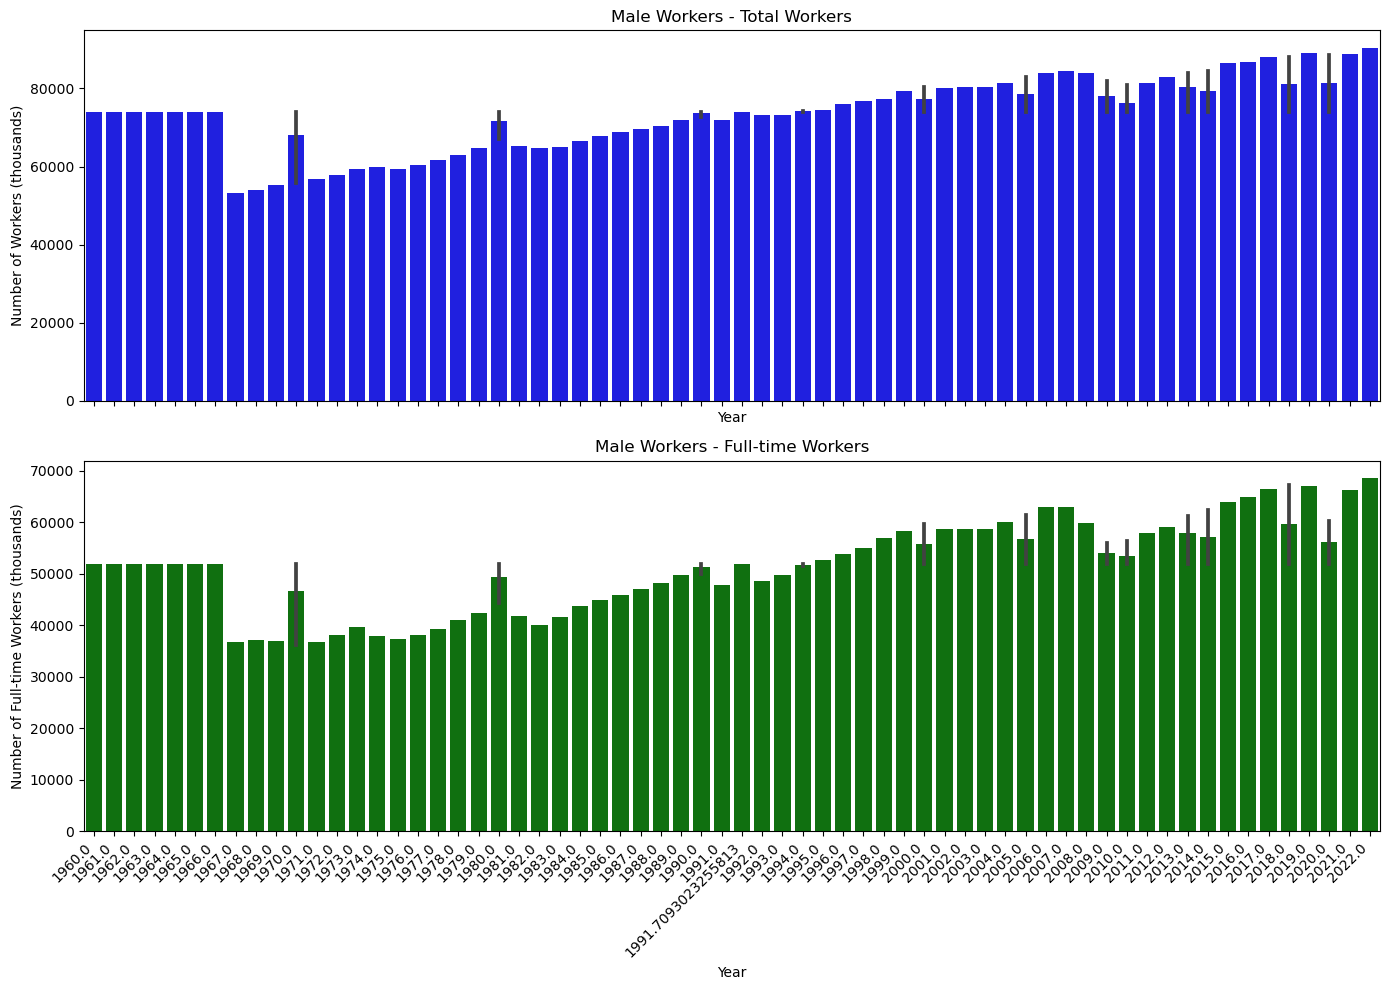

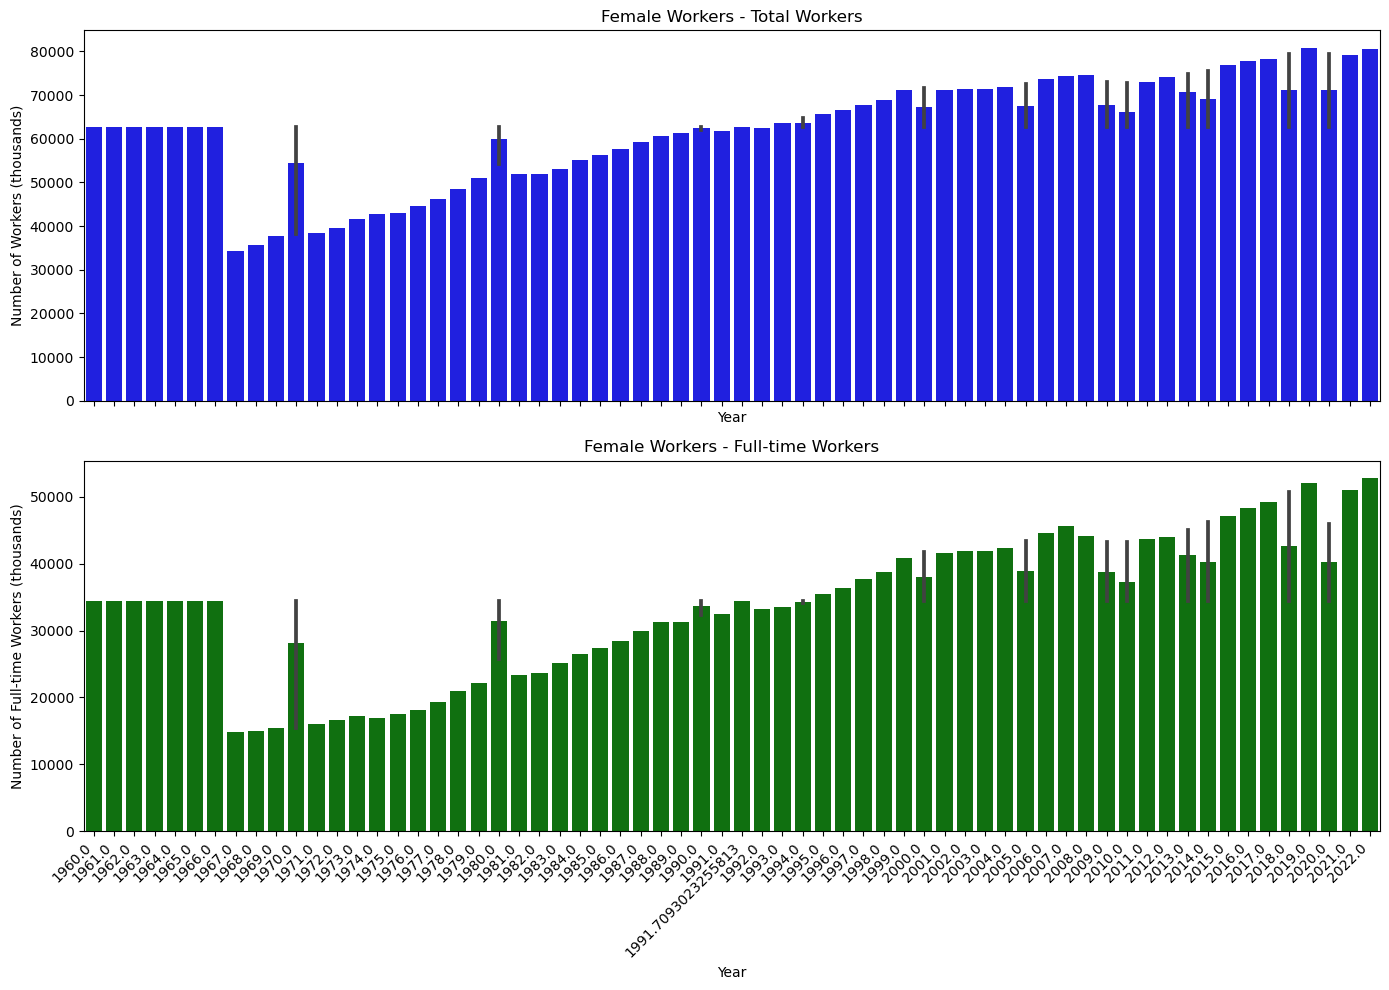

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file with correct header rows
file_path = 'Census15.csv'
census_data = pd.read_csv(file_path, header=[2, 3, 4])

# Flatten the MultiIndex columns
census_data.columns = [' '.join(col).strip() for col in census_data.columns.values]

# Rename columns for simplicity
census_data.columns = [
    'Year', 
    'Total workers Male Number of workers (thousands)', 'Total workers Male Median earnings (dollars)', 'Unused1',
    'Total workers Female Number of workers (thousands)', 'Total workers Female Median earnings (dollars)', 'Unused2',
    'Full-time workers Male Number of workers (thousands)', 'Full-time workers Male Median earnings (dollars)', 'Unused3',
    'Full-time workers Female Number of workers (thousands)', 'Full-time workers Female Median earnings (dollars)', 'Unused4',
    'Female-to-male earnings ratio'
]

# Drop unnecessary columns
census_data = census_data.drop(columns=['Unused1', 'Unused2', 'Unused3', 'Unused4'])

# Clean the 'Year' column by removing non-numeric characters and converting to numeric
census_data['Year'] = census_data['Year'].str.extract('(\d{4})', expand=False)
census_data['Year'] = pd.to_numeric(census_data['Year'], errors='coerce')

# Clean numeric columns by removing non-numeric characters (like commas)
numeric_columns = [
    'Total workers Male Number of workers (thousands)', 'Total workers Male Median earnings (dollars)',
    'Total workers Female Number of workers (thousands)', 'Total workers Female Median earnings (dollars)',
    'Full-time workers Male Number of workers (thousands)', 'Full-time workers Male Median earnings (dollars)',
    'Full-time workers Female Number of workers (thousands)', 'Full-time workers Female Median earnings (dollars)'
]

for column in numeric_columns:
    census_data[column] = census_data[column].replace({',': ''}, regex=True)

# Convert relevant columns to numeric, forcing errors to NaN
for column in numeric_columns:
    census_data[column] = pd.to_numeric(census_data[column], errors='coerce')

# Handle NaNs: Fill with column mean
census_data = census_data.fillna(census_data.mean())

# Extract relevant columns for male and female workers
male_columns = [
    'Year', 
    'Total workers Male Number of workers (thousands)', 'Total workers Male Median earnings (dollars)', 
    'Full-time workers Male Number of workers (thousands)', 'Full-time workers Male Median earnings (dollars)'
]

female_columns = [
    'Year', 
    'Total workers Female Number of workers (thousands)', 'Total workers Female Median earnings (dollars)', 
    'Full-time workers Female Number of workers (thousands)', 'Full-time workers Female Median earnings (dollars)'
]

male_data = census_data[male_columns]
female_data = census_data[female_columns]

# Rename columns for better readability
male_data.columns = ['Year', 'Total Workers Number', 'Total Workers Earnings', 'Full-time Workers Number', 'Full-time Workers Earnings']
female_data.columns = ['Year', 'Total Workers Number', 'Total Workers Earnings', 'Full-time Workers Number', 'Full-time Workers Earnings']

# Plot bar charts with rotated labels
def plot_bar_chart(data, title):
    if data.empty:
        print(f"No data available for {title}")
        return
    fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    sns.barplot(x='Year', y='Total Workers Number', data=data, ax=ax[0], color='b')
    ax[0].set_ylabel('Number of Workers (thousands)')
    ax[0].set_title(title + ' - Total Workers')

    sns.barplot(x='Year', y='Full-time Workers Number', data=data, ax=ax[1], color='g')
    ax[1].set_ylabel('Number of Full-time Workers (thousands)')
    ax[1].set_xlabel('Year')
    ax[1].set_title(title + ' - Full-time Workers')

    # Rotate x-axis labels for better readability
    for ax in ax:
        for label in ax.get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('right')

    plt.tight_layout()
    
    save_path = r"C:\Users\scann\Documents\Census Data"

     # Save the chart as a PNG file if save_path is provided
    if save_path:
        plt.savefig(f"{save_path}/{title}.png")
    plt.show()
    plt.show()

# Plot the data
plot_bar_chart(male_data, 'Male Workers')
plot_bar_chart(female_data, 'Female Workers')


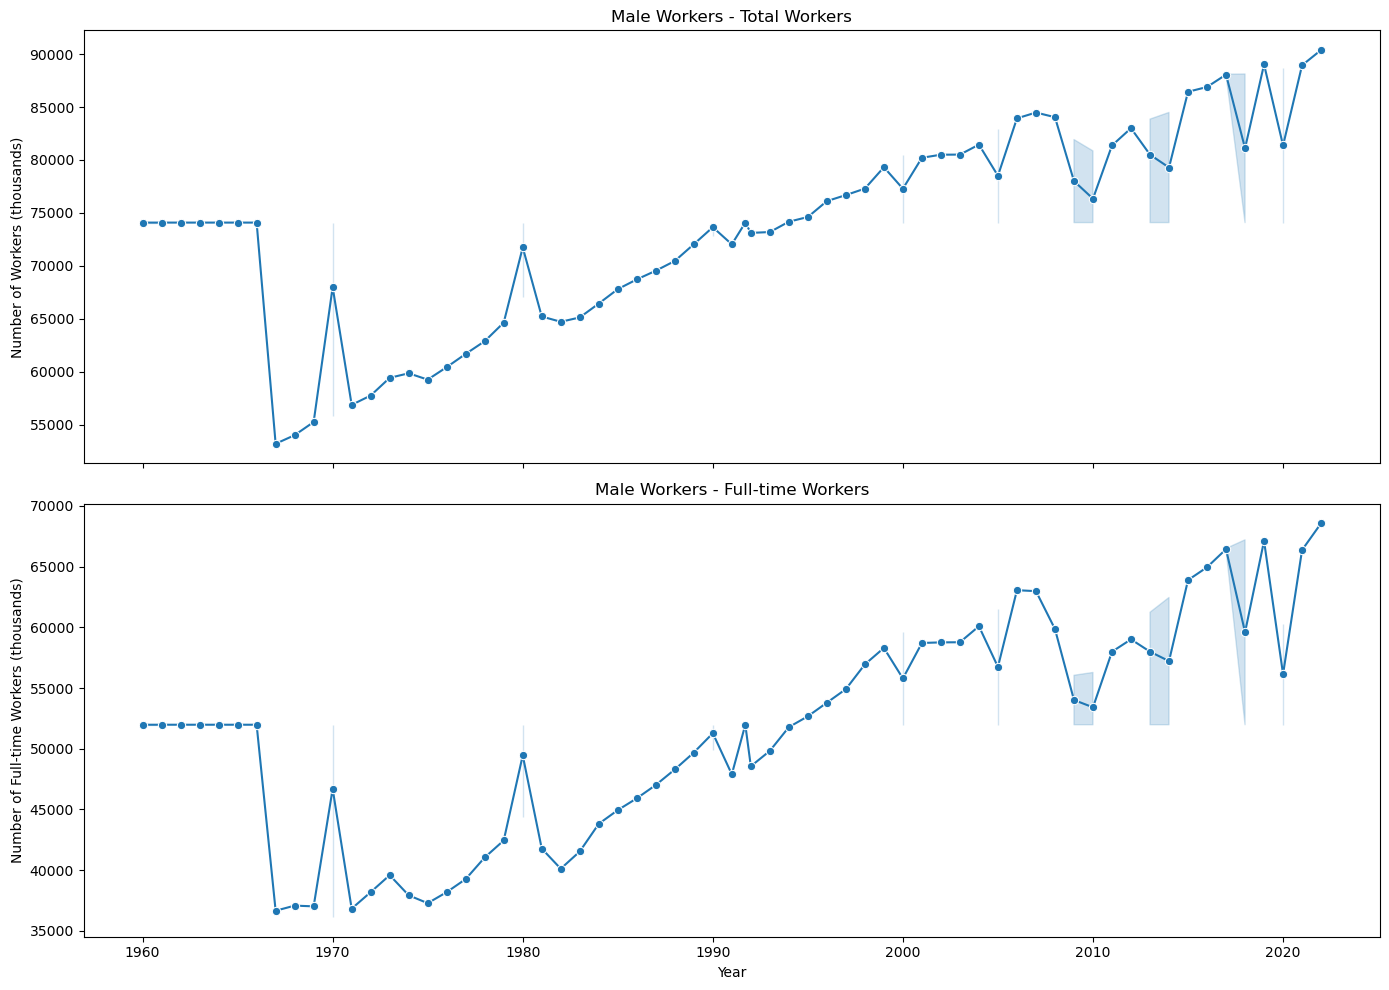

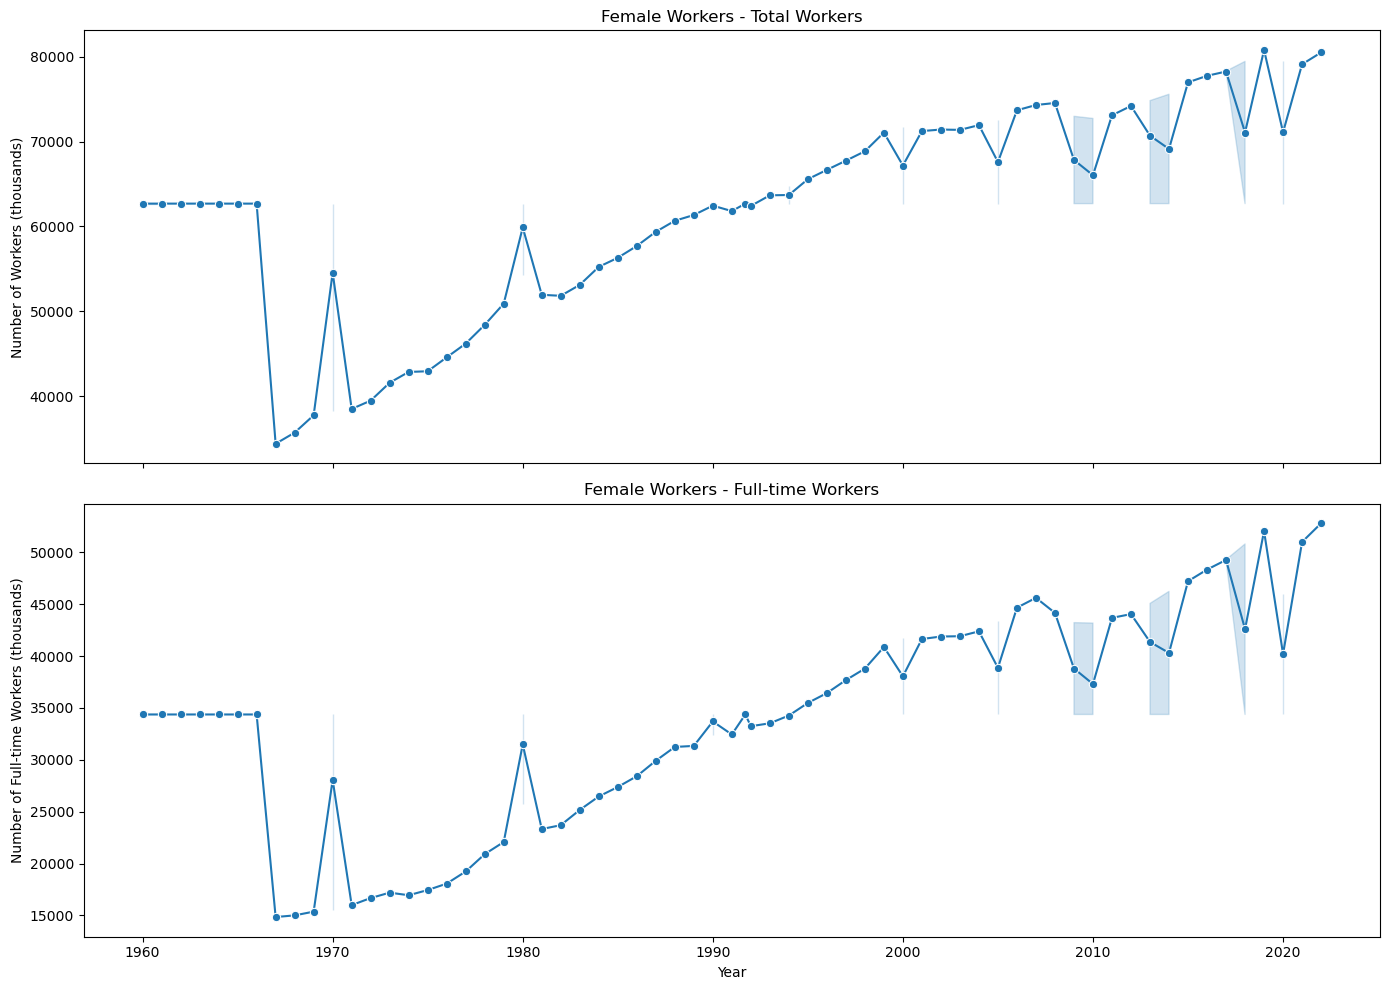

In [65]:
def plot_line_chart(data, title):
    if data.empty:
        print(f"No data available for {title}")
        return
    fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
    
    sns.lineplot(x='Year', y='Total Workers Number', data=data, ax=ax[0], marker='o')
    ax[0].set_ylabel('Number of Workers (thousands)')
    ax[0].set_title(title + ' - Total Workers')

    sns.lineplot(x='Year', y='Full-time Workers Number', data=data, ax=ax[1], marker='o')
    ax[1].set_ylabel('Number of Full-time Workers (thousands)')
    ax[1].set_xlabel('Year')
    ax[1].set_title(title + ' - Full-time Workers')

    plt.tight_layout()
    save_path = r"C:\Users\scann\Documents\Census Data"

     # Save the chart as a PNG file if save_path is provided
    if save_path:
        plt.savefig(f"{save_path}/{title}.png")
    plt.show()

# Plot the data
plot_line_chart(male_data, 'Male Workers')
plot_line_chart(female_data, 'Female Workers') 

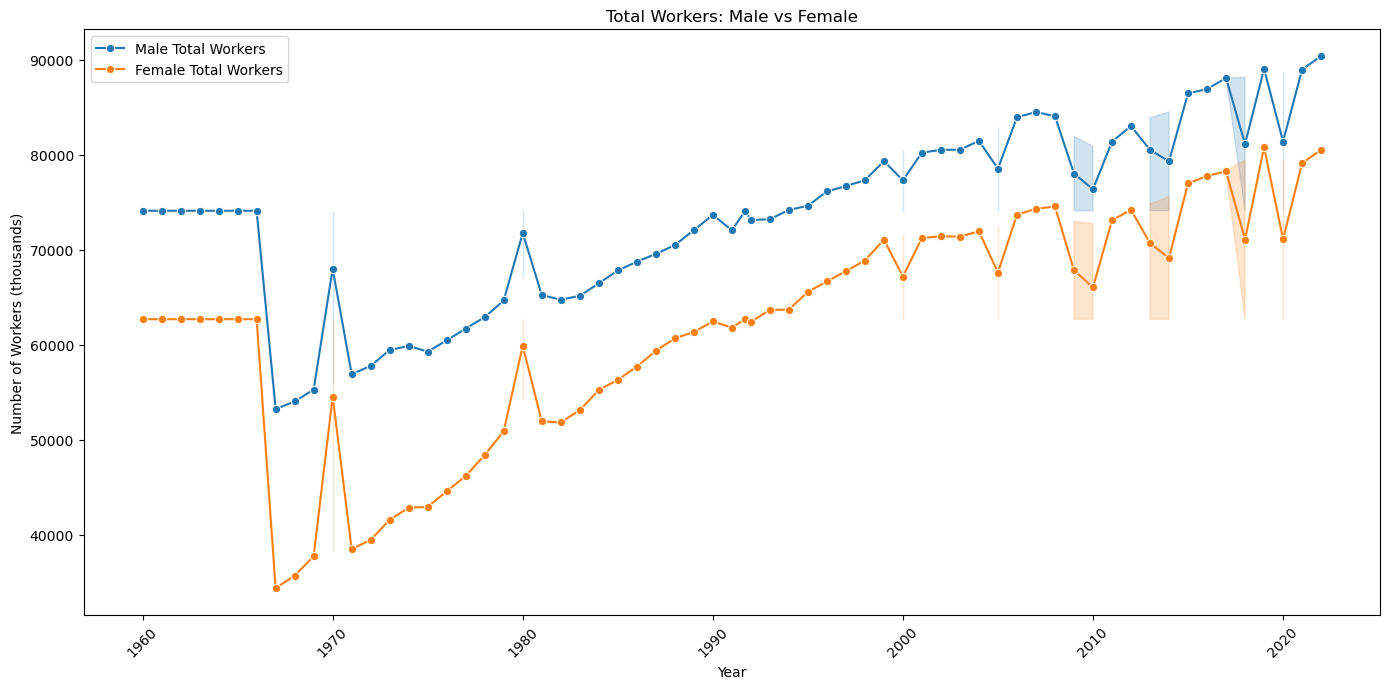

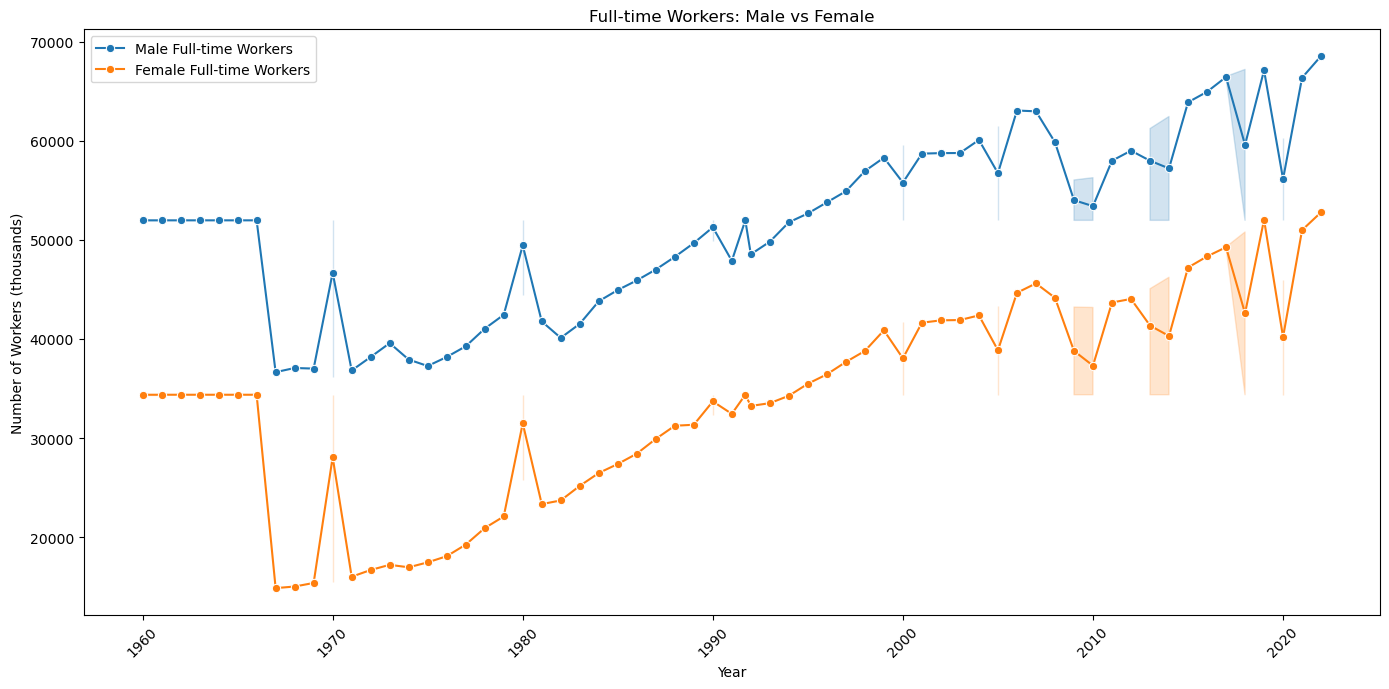

In [67]:
# Plot comparison line charts
def plot_comparison_line_chart(male_data, female_data, y_label, title):
    plt.figure(figsize=(14, 7))
    
    sns.lineplot(x='Year', y='Total Workers Number', data=male_data, marker='o', label='Male Total Workers')
    sns.lineplot(x='Year', y='Total Workers Number', data=female_data, marker='o', label='Female Total Workers')
    
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_comparison_full_time_chart(male_data, female_data, y_label, title):
    plt.figure(figsize=(14, 7))
    
    sns.lineplot(x='Year', y='Full-time Workers Number', data=male_data, marker='o', label='Male Full-time Workers')
    sns.lineplot(x='Year', y='Full-time Workers Number', data=female_data, marker='o', label='Female Full-time Workers')
    
    plt.xlabel('Year')
    plt.ylabel(y_label)
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    save_path = r"C:\Users\scann\Documents\Census Data"

     # Save the chart as a PNG file if save_path is provided
    if save_path:
        plt.savefig(f"{save_path}/{title}.png")
    plt.show()
    plt.show()

# Plot the data
plot_comparison_line_chart(male_data, female_data, 'Number of Workers (thousands)', 'Total Workers: Male vs Female')
plot_comparison_full_time_chart(male_data, female_data, 'Number of Workers (thousands)', 'Full-time Workers: Male vs Female')

In [68]:
#Calculate the Census data
# Calculate the percentage of full-time workers
census_data['Male Full-time Percentage'] = (census_data['Full-time workers Male Number of workers (thousands)'] / census_data['Total workers Male Number of workers (thousands)']) * 100
census_data['Female Full-time Percentage'] = (census_data['Full-time workers Female Number of workers (thousands)'] / census_data['Total workers Female Number of workers (thousands)']) * 100

# Print the updated dataframe
print("\nCensus Data with Full-time Percentages:")
print(census_data[['Year', 'Male Full-time Percentage', 'Female Full-time Percentage']].head())


Census Data with Full-time Percentages:
          Year  Male Full-time Percentage  Female Full-time Percentage
0  1991.709302                  70.148417                    54.831567
1  1991.709302                  70.148417                    54.831567
2  2022.000000                  75.868555                    65.585787
3  2021.000000                  74.623342                    64.462705
4  2020.000000                  68.020305                    57.861635


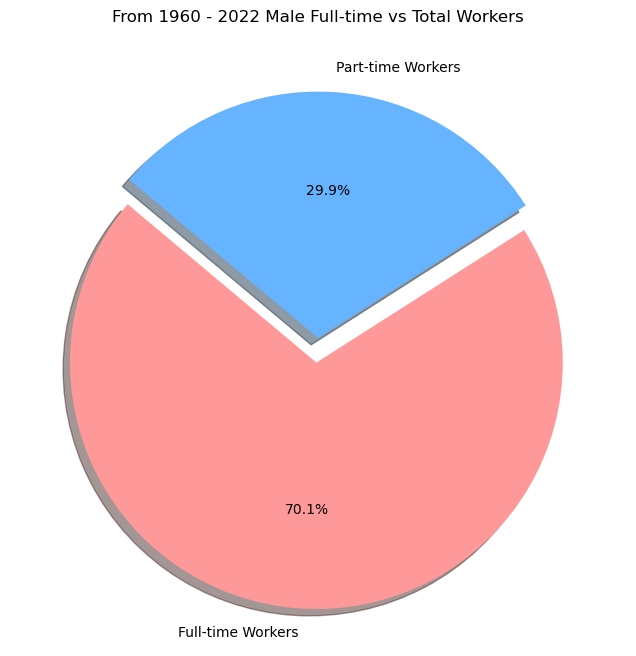

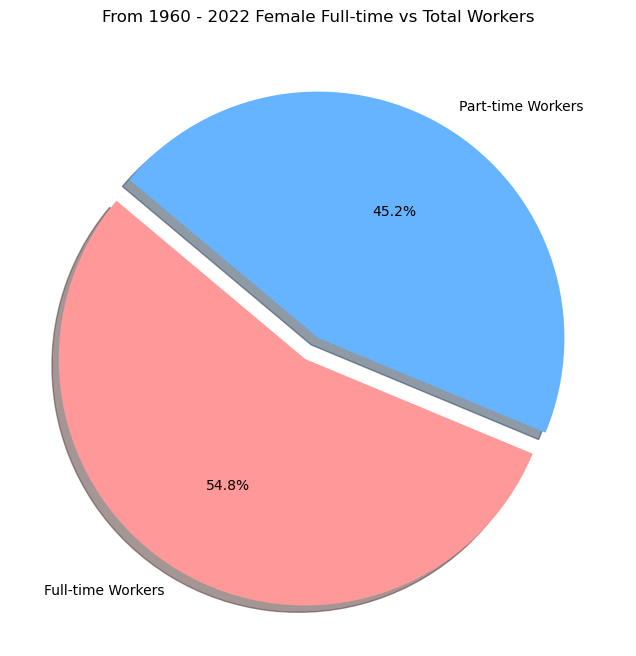

In [69]:
# Create Pie Charts to Visualize Percentages
import matplotlib.pyplot as plt

def plot_pie_chart(data, category, title):
    latest_data = data.iloc[-1]  # Get the latest year's data
    labels = ['Full-time Workers', 'Part-time Workers']
    
    sizes = [
        latest_data[f'{category} Full-time Percentage'],
        100 - latest_data[f'{category} Full-time Percentage']
    ]
    
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # explode the 1st slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=140)
    
    plt.title(title)
    
    save_path = r"C:\Users\scann\Documents\Census Data"

     # Save the chart as a PNG file if save_path is provided
    if save_path:
        plt.savefig(f"{save_path}/{title}.png")
    
    plt.show()

# Plot pie charts for the latest data
plot_pie_chart(census_data, 'Male', 'From 1960 - 2022 Male Full-time vs Total Workers')
plot_pie_chart(census_data, 'Female', 'From 1960 - 2022 Female Full-time vs Total Workers')


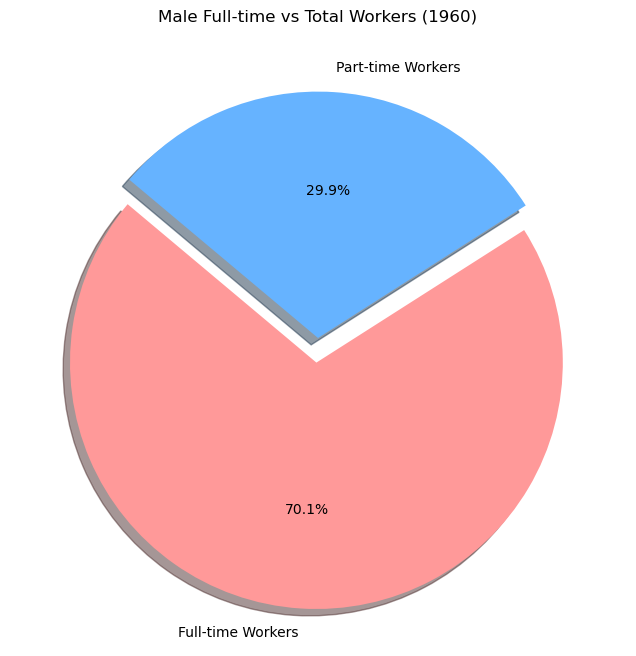

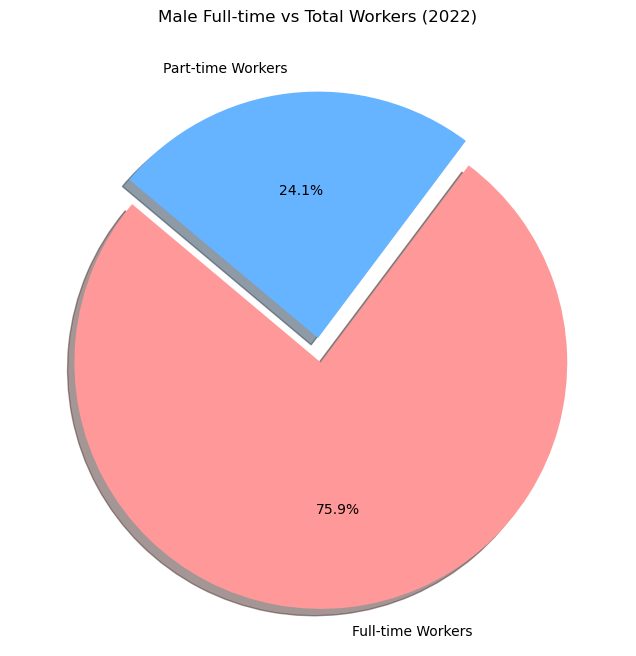

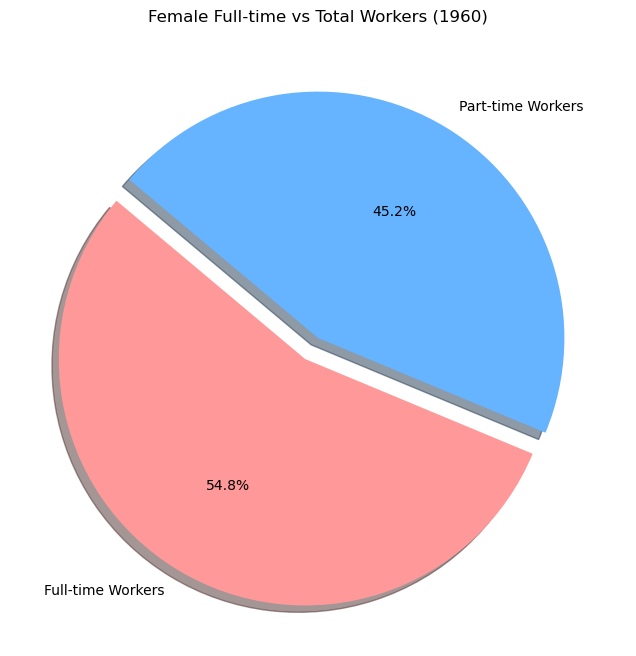

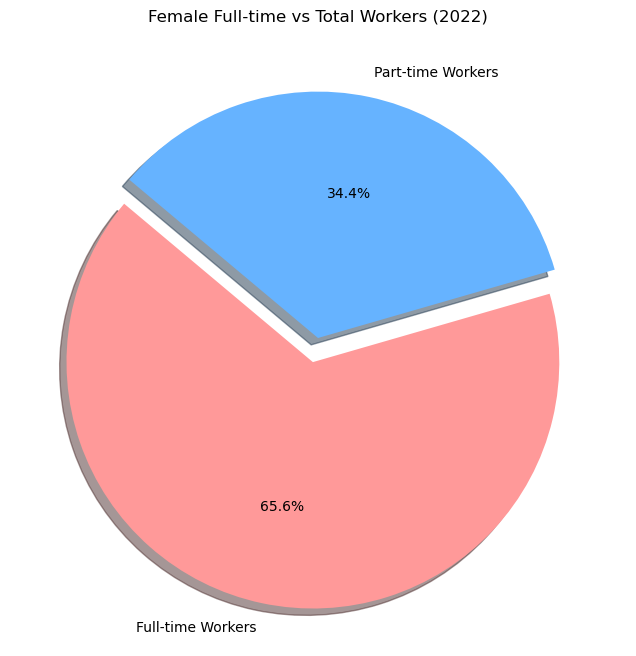

In [71]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, category, title, years):
    for year in years:
        year_data = data[data['Year'] == year].iloc[0]
        labels = ['Full-time Workers', 'Part-time Workers']

        sizes = [
            year_data[f'{category} Full-time Percentage'],
            100 - year_data[f'{category} Full-time Percentage']
        ]

        colors = ['#ff9999','#66b3ff']
        explode = (0.1, 0)  # explode the 1st slice

        plt.figure(figsize=(8, 8))
        plt.pie(sizes, explode=explode, labels=labels, colors=colors,
                autopct='%1.1f%%', shadow=True, startangle=140)

        plt.title(f"{title} ({year})")
        save_path = r"C:\Users\scann\Documents\Census Data"
        
        if save_path:
            plt.savefig(f"{save_path}/{title}.png")
    
        plt.show()

    

# Plot pie charts for specific years
plot_pie_chart(census_data, 'Male', 'Male Full-time vs Total Workers', [1960, 2022])
plot_pie_chart(census_data, 'Female', 'Female Full-time vs Total Workers', [1960, 2022])


In [55]:
# Find the year with the highest full-time male workers
max_male_year = census_data.loc[census_data['Male Full-time Percentage'].idxmax()]['Year']

# Find the year with the highest full-time female workers
max_female_year = census_data.loc[census_data['Female Full-time Percentage'].idxmax()]['Year']

print("Year with the highest full-time male workers:", max_male_year)
print("Year with the highest full-time female workers:", max_female_year)


Year with the highest full-time male workers: 2018.0
Year with the highest full-time female workers: 2022.0


In [56]:
# Find the year with the lowest full-time male workers
min_male_year = census_data.loc[census_data['Male Full-time Percentage'].idxmin()]['Year']

# Find the year with the lowest full-time female workers
min_female_year = census_data.loc[census_data['Female Full-time Percentage'].idxmin()]['Year']

print("Year with the lowest full-time male workers:", min_male_year)
print("Year with the lowest full-time female workers:", min_female_year)


Year with the lowest full-time male workers: 1982.0
Year with the lowest full-time female workers: 1974.0
